# Algebraic equations

## Solving an algebraic equation

If `S` is a symbolic expression, the command `solve`, attempts to find values of the symbolic variable in `S` for which `S` is zero, eg.

In [1]:
pkg load symbolic
syms x S
S = x^2-3*x-4
solve(S)

OctSymPy v2.6.0: this is free software without warranty, see source.
Initializing communication with SymPy using a popen2() pipe.
Some output from the Python subprocess (pid 3130) might appear next.
Python 2.7.14 (default, Nov  3 2017, 10:55:25) 
[GCC 7.2.1 20170915 (Red Hat 7.2.1-2)] on linux2
Type "help", "copyright", "credits" or "license" for more information.
>>> >>> 
OctSymPy: Communication established.  SymPy v1.1.1.
S = (sym)

   2          
  x  - 3⋅x - 4

ans = (sym 2×1 matrix)

  ⎡-1⎤
  ⎢  ⎥
  ⎣4 ⎦



If more than one symbolic variable is used in the expression `E`, you must specify with respect to which variable you want to solve the equation, eg.

In [2]:
syms a b c x
E = a*x^2+b*x+c == 0
solve(E, x)
solve(E, b)

E = (sym)

     2              
  a⋅x  + b⋅x + c = 0

ans = (sym 2×1 matrix)

  ⎡           _____________⎤
  ⎢          ╱           2 ⎥
  ⎢   b    ╲╱  -4⋅a⋅c + b  ⎥
  ⎢- ─── - ────────────────⎥
  ⎢  2⋅a         2⋅a       ⎥
  ⎢                        ⎥
  ⎢           _____________⎥
  ⎢          ╱           2 ⎥
  ⎢   b    ╲╱  -4⋅a⋅c + b  ⎥
  ⎢- ─── + ────────────────⎥
  ⎣  2⋅a         2⋅a       ⎦

ans = (sym)

         c
  -a⋅x - ─
         x



## Systems of algebraic equations

As an example, suppose you have the system
$$
\begin{cases}
x^2y^2=0\\
x-\frac{y}{2}=\alpha
\end{cases}
$$
and you want to solve for $x$ and $y$:

In [3]:
syms x y alpha
[x, y] = solve(x^2*y^2==0, x-y/2==alpha, x, y)

x = (sym 2×1 matrix)

  ⎡α⎤
  ⎢ ⎥
  ⎣0⎦

y = (sym 2×1 matrix)

  ⎡ 0  ⎤
  ⎢    ⎥
  ⎣-2⋅α⎦



The solutions are
$$
\begin{cases}
x = \alpha,\ y = 0\\
x = 0,\ y=-2\alpha
\end{cases}
$$

This way of assigning output from `solve` is quite successful for "small" systems. If you had a 10-by-10 system of equations, typing

`[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10] = solve(...)`

is both awkward and time consuming. To circumvent this difficulty, `solve` in MATLAB can return a struct whose fields are the solutions, and `solve` in Octave can return a cell array containing structs whose fields are the solution.

In [4]:
syms a u v
S = solve(u^2-v^2==a^2, u+v==1, a^2-2*a==3);
sol1 = S{1}; % octave
sol2 = S{2}; % octave
a = [sol1.a; sol2.a]
u = [sol1.u; sol2.u]
v = [sol1.v; sol2.v]
%S.a % MATLAB
%S.u % MATLAB
%S.v % MATLAB

a = (sym 2×1 matrix)

  ⎡-1⎤
  ⎢  ⎥
  ⎣3 ⎦

u = (sym 2×1 matrix)

  ⎡1⎤
  ⎢ ⎥
  ⎣5⎦

v = (sym 2×1 matrix)

  ⎡0 ⎤
  ⎢  ⎥
  ⎣-4⎦



## Linear systems

Linear systems of equations can also be solved using matrix division, eg.

In [5]:
syms u v x y
S = solve(x+2*y-u, 4*x+5*y-v, x, y);
sol = [S.x;S.y]
A = [1, 2; 4, 5];
b = [u; v];
z = A\b

sol = (sym 2×1 matrix)

  ⎡  5⋅u   2⋅v⎤
  ⎢- ─── + ───⎥
  ⎢   3     3 ⎥
  ⎢           ⎥
  ⎢  4⋅u   v  ⎥
  ⎢  ─── - ─  ⎥
  ⎣   3    3  ⎦

z = (sym 2×1 matrix)

  ⎡  5⋅u   2⋅v⎤
  ⎢- ─── + ───⎥
  ⎢   3     3 ⎥
  ⎢           ⎥
  ⎢  4⋅u   v  ⎥
  ⎢  ─── - ─  ⎥
  ⎣   3    3  ⎦



## Solving symbolic equations numerically

Symbolic equations can also be solved numerically with the command `vpasolve`, eg.

In [6]:
syms x y
eqns = [y*exp(x) == 16; x^5 == x + x*y^2];
vpasolve(eqns, [x; y], [1; 1])

ans = (sym 2×1 matrix)

  ⎡1.7324062670465659633407456995303⎤
  ⎢                                 ⎥
  ⎣2.8297332667835974266598942031498⎦



Complex roots can be found but you must provide a complex initial guess:

In [7]:
syms x
vpasolve(x^2 + 2 == 0, x, 1i)

ans = (sym) 1.4142135623730950488016887242097⋅ⅈ


# Calculus


## Limits

### Definition

The fundamental idea of a limit is to make calculations on functions as a variable "gets close to" or approaches a certain value. Recall that the definition of the derivative is given by a limit
$$
f^\prime = \lim_{h\rightarrow 0}\frac{f(x+h)-f(x}{h}
$$
provided this limit exists. The command `limit` enables you to calculate the limits of functions directly, eg.

In [8]:
syms h x
limit((cos(x+h)-cos(x))/h, h, 0)

ans = (sym) -sin(x)


Another example
$$
\lim_{n\rightarrow\infty}\left(1+\frac{x}{n}\right)^n=e^x
$$


In [9]:
syms n x
limit((1+x/n)^n, n, inf)

ans = (sym)

   x
  ℯ 



### One-sided limits

You can also calculate one-sided limits, eg.

f = (sym)

   x 
  ───
  │x│

ans = (sym) -1
ans = (sym) 1


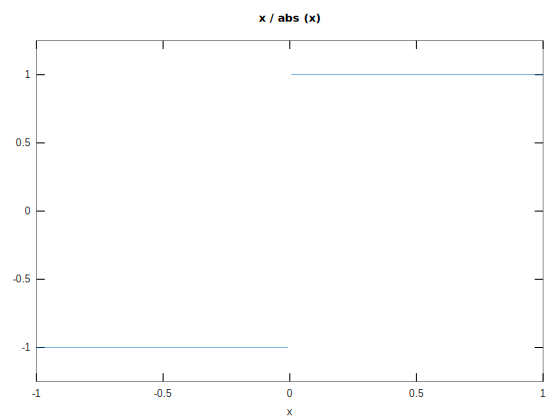

In [10]:
%plot --format svg
syms x
f = x/abs(x)
ezplot(f, [-1, 1])
limit(f,x,0,'left')
limit(f,x,0,'right')

## Differentiation

### Derivatives of symbolic functions

To illustrate how to take derivatives, first create a symbolic expression:

In [11]:
syms x
f = sin(5*x)

f = (sym) sin(5⋅x)


The command

In [12]:
diff(f)

ans = (sym) 5⋅cos(5⋅x)


differentiates `f` with respect to `x`.

Let

In [13]:
g = exp(x)*cos(x)

g = (sym)

   x       
  ℯ ⋅cos(x)



and differentiate `g`:

In [14]:
diff(g)

ans = (sym)

     x           x       
  - ℯ ⋅sin(x) + ℯ ⋅cos(x)



To take the second derivative of `g`, enter

In [15]:
diff(g, 2)

ans = (sym)

      x       
  -2⋅ℯ ⋅sin(x)



You can get the same result by taking the derivative twice:

In [16]:
diff(diff(g))

ans = (sym)

      x       
  -2⋅ℯ ⋅sin(x)



### Derivatives of functions with several variables

To differentiate a function that contains more than one symbolic variable, you must specify with respect to which variable you want to differentiate. the `diff` command then calculates the partial derivative of the expression with respect to that variable, eg. the commands

In [17]:
syms s t
f = sin(s*t)
diff(f, t)

f = (sym) sin(s⋅t)
ans = (sym) s⋅cos(s⋅t)


calculate the partial derivative of the function $f:\mathbb R^2\rightarrow \mathbb R:(s,t)\mapsto \sin(st)$, i.e. 
$$
\frac{\partial f}{\partial t}:\mathbb R^2\rightarrow \mathbb R:(s,t)\mapsto s\cos(st)
$$

To differentiate with respect to the variable `s`, enter

In [18]:
diff(f, s)

ans = (sym) t⋅cos(s⋅t)


If you do not specify a variable, MATLAB chooses a default variable by the same rule as described in the previous lecture (`subs` command).

Some more examples:

In [19]:
syms a b x n t theta
f = x^n;
df = diff(f)
simplify(df)
g = sin(a*t+b);
dg = diff(g)
h = exp(1i*theta);
dh = diff(h)

df = (sym)

     n
  n⋅x 
  ────
   x  

ans = (sym)

     n - 1
  n⋅x     

dg = (sym) a⋅cos(a⋅t + b)
dh = (sym)

     ⅈ⋅θ
  ⅈ⋅ℯ   



### Gradient

The command `gradient(f,v)` finds the gradient vector of the scalar function `f` with respect to vector `v` in Cartesian coordinates:
$$\nabla f=\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}\\
\frac{\partial f}{\partial z}
\end{bmatrix}$$

In [20]:
syms x y
f = x^2 + y^2;
gradf = gradient(f)

gradf = (sym 2×1 matrix)

  ⎡2⋅x⎤
  ⎢   ⎥
  ⎣2⋅y⎦



The gradient points in the direction of maximal increase:

ff =

@(x, y) x .^ 2 + y .^ 2



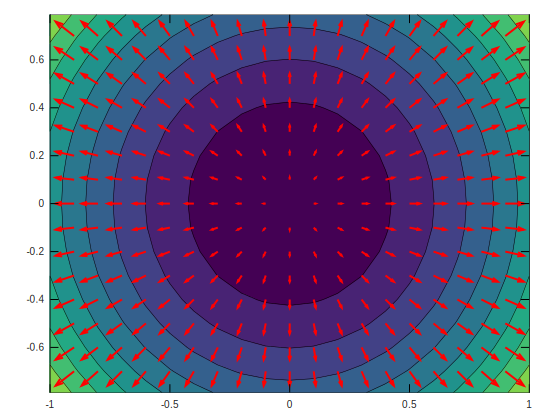

In [21]:
[X, Y] = meshgrid(-1:.1:1,-1:.1:1);
ff = matlabFunction(f)
contourf(X, Y, ff(X,Y))
axis equal
hold on
fg1 = matlabFunction(gradf(1)); % convert symbolic function to a MATLAB function
fg2 = matlabFunction(gradf(2));
quiver(X, Y, fg1(X), fg2(Y),'linewidth', 2, 'color', 'red');

### Derivatives of vector (matrix) valued functions

The `diff` command can also take a symbolic vector (or matrix) as its input. In this case the differentiation is done element-by-element, eg.

In [22]:
syms a x
A = [cos(a*x), sin(a*x); -sin(a*x), cos(a*x)];
diff(A)

ans = (sym 2×2 matrix)

  ⎡-a⋅sin(a⋅x)  a⋅cos(a⋅x) ⎤
  ⎢                        ⎥
  ⎣-a⋅cos(a⋅x)  -a⋅sin(a⋅x)⎦



### Jacobian

You can also perform differentiation of a column vector with respect to a row vector. Consider the transformation from Euclidean $(x,y,z)$ to spherical ($(r, \lambda, \phi)$ coordinates as given by
$$
\begin{cases}
x = r \cos\lambda\cos\phi\\
y = r \cos\lambda\sin\phi\\
z = r \sin\lambda
\end{cases}
$$
Note that $\lambda$ corresponds to elevation or latitude while $\phi$ denotes azimuth or longitude.

To calculate the Jacobian matrix $J$, of this transformation, use the `jacobian` command. The mathematical notation for $J$ is
$$
J = \frac{\partial(x,y,z)}{\partial(r,\lambda,\phi)}
$$


The commands

In [23]:
syms r lambda phi
x = r*cos(lambda)*cos(phi)
y = r*cos(lambda)*sin(phi)
z = r*sin(lambda)
J = jacobian([x;y;z],[r lambda phi])

x = (sym) r⋅cos(λ)⋅cos(φ)
y = (sym) r⋅sin(φ)⋅cos(λ)
z = (sym) r⋅sin(λ)
J = (sym 3×3 matrix)

  ⎡cos(λ)⋅cos(φ)  -r⋅sin(λ)⋅cos(φ)  -r⋅sin(φ)⋅cos(λ)⎤
  ⎢                                                 ⎥
  ⎢sin(φ)⋅cos(λ)  -r⋅sin(λ)⋅sin(φ)  r⋅cos(λ)⋅cos(φ) ⎥
  ⎢                                                 ⎥
  ⎣   sin(λ)          r⋅cos(λ)             0        ⎦



return the Jacobian and the command

In [24]:
detJ = simplify(det(J))

detJ = (sym)

    2       
  -r ⋅cos(λ)



returns its determinant.

### Curl

The curl of the vector field $\bar v = \begin{bmatrix} v_1(x,y,z)\\ v_2(x,y,z)\\ v_3(x,y,z)\end{bmatrix}$ with respect to the vector $\begin{bmatrix}x\\y\\z\end{bmatrix}$ in Cartesian coordinates is the vector
$$
\nabla \times \bar v = \begin{bmatrix}
\frac{\partial v_3}{\partial y}-\frac{\partial v_2}{\partial z}\\
\frac{\partial v_1}{\partial z}-\frac{\partial v_3}{\partial x}\\
\frac{\partial v_2}{\partial x}-\frac{\partial v_1}{\partial y}
\end{bmatrix}
$$

In [25]:
syms x y z
curl([x^3*y^2*z; y^3*z^2*x; z^3*x^2*y], [x; y; z])

ans = (sym 3×1 matrix)

  ⎡  2  3        3   ⎤
  ⎢ x ⋅z  - 2⋅x⋅y ⋅z ⎥
  ⎢                  ⎥
  ⎢  3  2          3 ⎥
  ⎢ x ⋅y  - 2⋅x⋅y⋅z  ⎥
  ⎢                  ⎥
  ⎢     3        3  2⎥
  ⎣- 2⋅x ⋅y⋅z + y ⋅z ⎦



The curl of a vector field at a specified point indicates that an elementary paddle wheel placed in the point will start rotating yes or no:

In [26]:
syms x y z
v = [y; -x; 0];
curl(v, [x; y; z])

ans = (sym 3×1 matrix)

  ⎡0 ⎤
  ⎢  ⎥
  ⎢0 ⎥
  ⎢  ⎥
  ⎣-2⎦



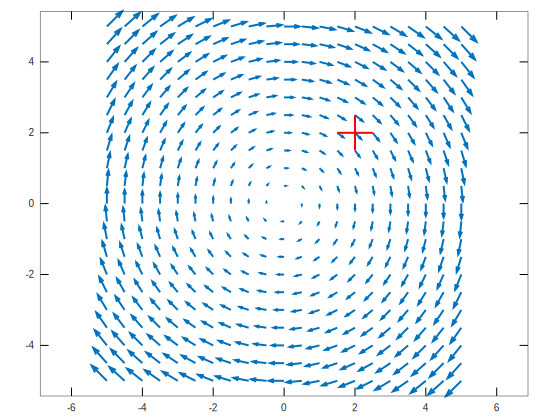

In [27]:
[X, Y] = meshgrid(-5:.5:5,-5:.5:5);
v1 = matlabFunction(v(1));
v2 = matlabFunction(v(2));
quiver(X,Y,v1(Y), v2(X), 'linewidth', 2);
axis equal
hold on
line([1.5, 2.5], [2.0, 2.0], 'Color','red', 'linewidth', 2);
line([2.0, 2.0], [1.5, 2.5], 'Color','red', 'linewidth', 2)

### Divergence

The divergence of the vector field $\bar v = \begin{bmatrix} v_1(x,y,z)\\ v_2(x,y,z)\\ v_3(x,y,z)\end{bmatrix}$ with respect to the vector $\begin{bmatrix}x\\y\\z\end{bmatrix}$ in Cartesian coordinates is the scalar
$$
\nabla \cdot \bar v = \frac{\partial v_1}{\partial x}+\frac{\partial v_2}{\partial y}+\frac{v_3}{\partial z}
$$

In [28]:
syms x y z
divergence([x; 2*y^2; 3*z^3], [x; y; z])

ans = (sym)

           2    
  4⋅y + 9⋅z  + 1



The divergence of a vector field at a specified point indicates if the inflow is larger or smaller than the outflow through an elementary cercle around that point:

In [29]:
syms x y z
v = [x; y; 0];
divergence(v, [x; y; z])

ans = (sym) 2


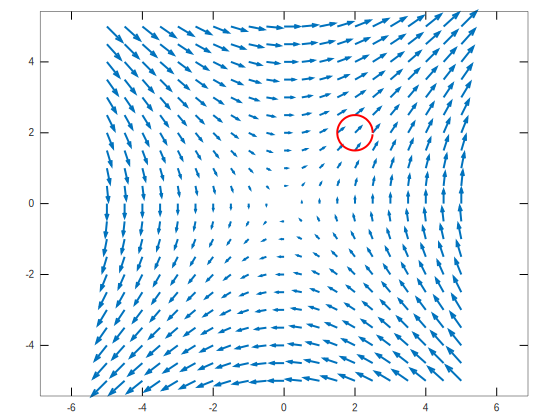

In [30]:
[X, Y] = meshgrid(-5:.5:5,-5:.5:5);
v1 = matlabFunction(v(1));
v2 = matlabFunction(v(2));
quiver(X,Y,v1(Y), v2(X), 'linewidth', 2);
axis equal
hold on
plot(2+0.5*cos([0:0.1:2*pi]),2+0.5*sin([0:0.1:2*pi]) , 'Color','red', 'linewidth', 2);

**If the curl and the divergence of a vector field are known, the vector field is completely specified!**

## Integration

### Indefinite integral

If `f` is a symbolic function, then `int(f)` attempts to find another symbolic expression `F`, so that `diff(F)=f`. The command `int`return the indefinite integral or antiderivative of `f` (provided one exists in closed form). Similar to differentiation, `int(f, v)` uses the symbolic variable `v` as the variable of integration.

Some examples:

In [31]:
syms x n a b t
int(x^n, x)
int(cos(a*t+b),x)
int(exp(-x^2), x)

ans = (sym)

  ⎧log(x)  for n = -1
  ⎪                  
  ⎪ n + 1            
  ⎨x                 
  ⎪──────  otherwise 
  ⎪n + 1             
  ⎩                  

ans = (sym) x⋅cos(a⋅t + b)
ans = (sym)

  √π⋅erf(x)
  ─────────
      2    



### Definite integral

Definite integration is also possible. The command `int(f,x,a,b)` is used to find a symbolic expression for
$$
\int_a^bf(x)\mathrm dx
$$

Some examples:

In [32]:
syms x
int(1/x, x, 1, 2)
int(exp(-x^2/2), x, 0, inf)

ans = (sym) log(2)
ans = (sym)

  √2⋅√π
  ─────
    2  



### Integration with real parameters

One of the subtleties involved in symbolic integration is the "value" of various parameters. Eg., if $a$ is any positive real number, the function `f`, defined by

In [33]:
syms x
a = sym('1/2');
f = exp(-a*x^2);

is the positive, bell shaped curve

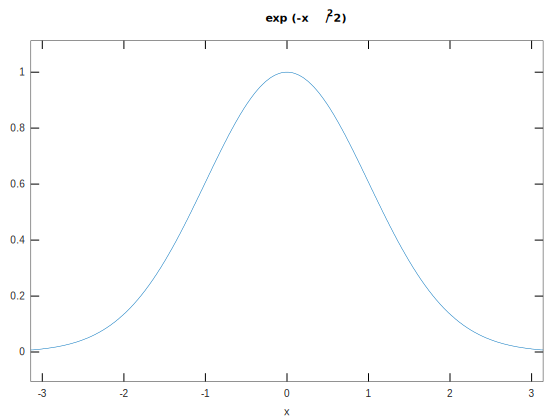

In [34]:
ezplot(f, [-pi,pi])

However is you try to calculate the integral
$$\int_{-\infty}^{\infty}e^{-ax^2}\mathrm dx$$
without assigning a value to $a$, MATLAB assumes that $a$ represents a complex number:

In [35]:
syms x a
F = int(exp(-a*x^2), x, -inf, inf);
pretty(F) % only needed for MATLAB to beautify the output

  ⎧     √π                                       π
  ⎪     ──       for │periodic_argument(a, ∞)│ ≤ ─
  ⎪     √a                                       2
  ⎪                                               
  ⎪∞                                              
  ⎨⌠                                              
  ⎪⎮       2                                      
  ⎪⎮   -a⋅x                                       
  ⎪⎮  ℯ      dx              otherwise            
  ⎪⌡                                              
  ⎩-∞                                             


If you are only interested in the case where $a$ is a real positive number, you can calculate the integral as follows:

In [36]:
syms a positive
syms x
int(exp(-a*x^2), x, -inf, inf)

ans = (sym)

  √π
  ──
  √a



## Symbolic summation

You can compute symbolic summations, when they exist, by using the `symsum` command, eg. the series
$$1 + \frac{1}{2^2}+\frac{1}{3^2}+\cdots$$ sums to 

In [37]:
syms k
s1 = symsum(1/k^2, 1, inf)

s1 = (sym)

   2
  π 
  ──
  6 



while the geometric series
$$1+\frac{1}{2}+\frac{1}{2}^2+\cdots$$ sums to

In [38]:
syms x k
a = sym('1/2');
s2 = symsum(a^k, 0, inf)

s2 = (sym) 2


## Taylor series

The statements

In [39]:
syms a, x
f = 1/(5+4*cos(x));
pretty(taylor(f, x, 0, 'order', 8))

x = (sym) x
      6       4      2    
  49⋅x     5⋅x    2⋅x    1
  ────── + ──── + ──── + ─
  131220   1458    81    9


gives all the terms up to, but not including, order eight in the Taylor series of $f(x)$ about $x=0$:
$$\sum_{n=0}^\infty\frac{1}{n!}(x-0)^nf^{(n)}(0)$$

These commands

In [40]:
syms x
g = exp(x*sin(x));
t = taylor(g, x, 2, 'order', 8);

Waiting..........


generate the first 8 nonzero terms of the Taylor series for $g$ about $x=2$.

We can plot both functions together to see how well the approximation compares to the actual function:

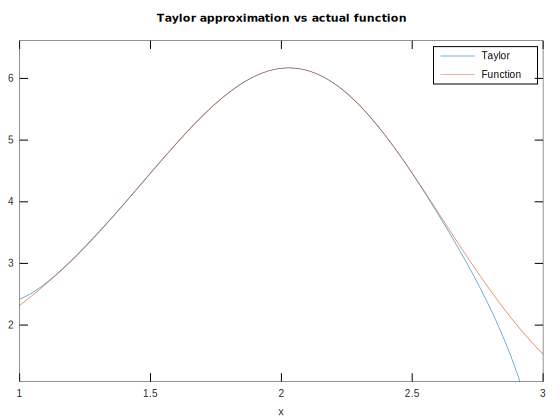

In [41]:
ezplot(t, [1, 3]);
hold on
ezplot(g, [1, 3]);
title('Taylor approximation vs actual function');
legend('Taylor', 'Function');

Taylor series in multiple variables are also possible, eg.

In [42]:
syms x y
f = exp(x*y);
taylor(f, [x,y] , [0,0], 'order', 5)

ans = (sym)

   2  2          
  x ⋅y           
  ───── + x⋅y + 1
    2            

